In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import pickle
from tqdm import tqdm

myparams = {
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}',
    'font.family': 'Djvu Serif',
    'font.size': 14,
    'axes.grid': True,
    'grid.alpha': 0.1,
    'lines.linewidth': 2,
    'lines.markersize': 8
}

plt.rcParams.update(myparams)

%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%autoreload 2

In [10]:
#figures_path = "../figures/"
figures_path = "../figures_gray/"

In [11]:
if figures_path == "../figures_gray/":
    from cycler import cycler
    monochrome = (cycler('color', ['k']) * cycler('marker', ['', '.']) *
                  cycler('linestyle', ['-', '--', ':', '-.']))
    plt.rc('axes', prop_cycle=monochrome)
    format = "eps"
else:
    format = "pdf"

In [4]:
from population import Population
from chromosome import Chromosome
from algorithm import Algorithm
from ga_operations import *

In [5]:
import os
import pickle

def save_object(obj, filename):
    # Overwrites any existing file.
    with open(filename, 'wb') as outp:
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)


def load_object(filename):
    with open(filename, 'rb') as inp:
        obj = pickle.load(inp)
        return obj

Загрузим данные, полученные в `data.ipynb`

# Regression

In [6]:
results_regression = load_object("../plots/datasets_regression.pkl")

С помощью генетического алгоритма найдем семейство функций, которые лучше всего приближают исследуемый набор зависимостей

In [7]:
POP_SIZE = 1000 #number of chromosomes in population
NUM_FOR_SELECTION = POP_SIZE // 3 #number of chromosomes to be chosen for selection
FUNCTIONS = {1: ['sin', 'cos', 'exp', 'log', 'ctg', 'cth'], 
             2: ['+', '-', '*', '/']} # unary and binary functions
DEPTH = 1 # initial depth of trees
MAX_DEPTH = 4 # maximum depth of a tree 
NUMBER_ITERS = 1000 # number of iterations

pop = Population(POP_SIZE, NUM_FOR_SELECTION, FUNCTIONS, DEPTH, MAX_DEPTH) # create the population
alg = Algorithm(pop, NUMBER_ITERS, datasets=results_regression, epoch_feedback=100) # create the algorithm
best = alg.train() #train the alrogithm

Training process has started


/Users/kisnikser/Documents/GitHub/Bayesian-Sample-Size-Estimation/code/genetic_algorithm/chromosome.py:108: RuntimeWarning: invalid value encountered in scalar divide
  return w[index] * 1/np.tan(left), index_left
/Users/kisnikser/Documents/GitHub/Bayesian-Sample-Size-Estimation/code/genetic_algorithm/chromosome.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  return w[index] * 1/np.tan(left), index_left
/Users/kisnikser/Documents/GitHub/Bayesian-Sample-Size-Estimation/code/genetic_algorithm/chromosome.py:106: RuntimeWarning: divide by zero encountered in log
  return w[index] * np.log(left), index_left
/Users/kisnikser/Documents/GitHub/Bayesian-Sample-Size-Estimation/code/genetic_algorithm/chromosome.py:106: RuntimeWarning: invalid value encountered in scalar multiply
  return w[index] * np.log(left), index_left
/Users/kisnikser/Documents/GitHub/Bayesian-Sample-Size-Estimation/code/genetic_algorithm/chromosome.py:96: RuntimeWarning: invalid value encountered in sc

[Epoch 100/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0016361594107230976
[Epoch 200/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0016361594107230976
[Epoch 300/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0016361594107230976
[Epoch 400/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0016361594107230976
[Epoch 500/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0016361594107230976
[Epoch 600/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0016361594107230976
[Epoch 700/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0016361594107230976
[Epoch 800/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0016361594107230976
[Epoch 900/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0016361594107230976
[Epoch 1000/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0016361594107230976


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


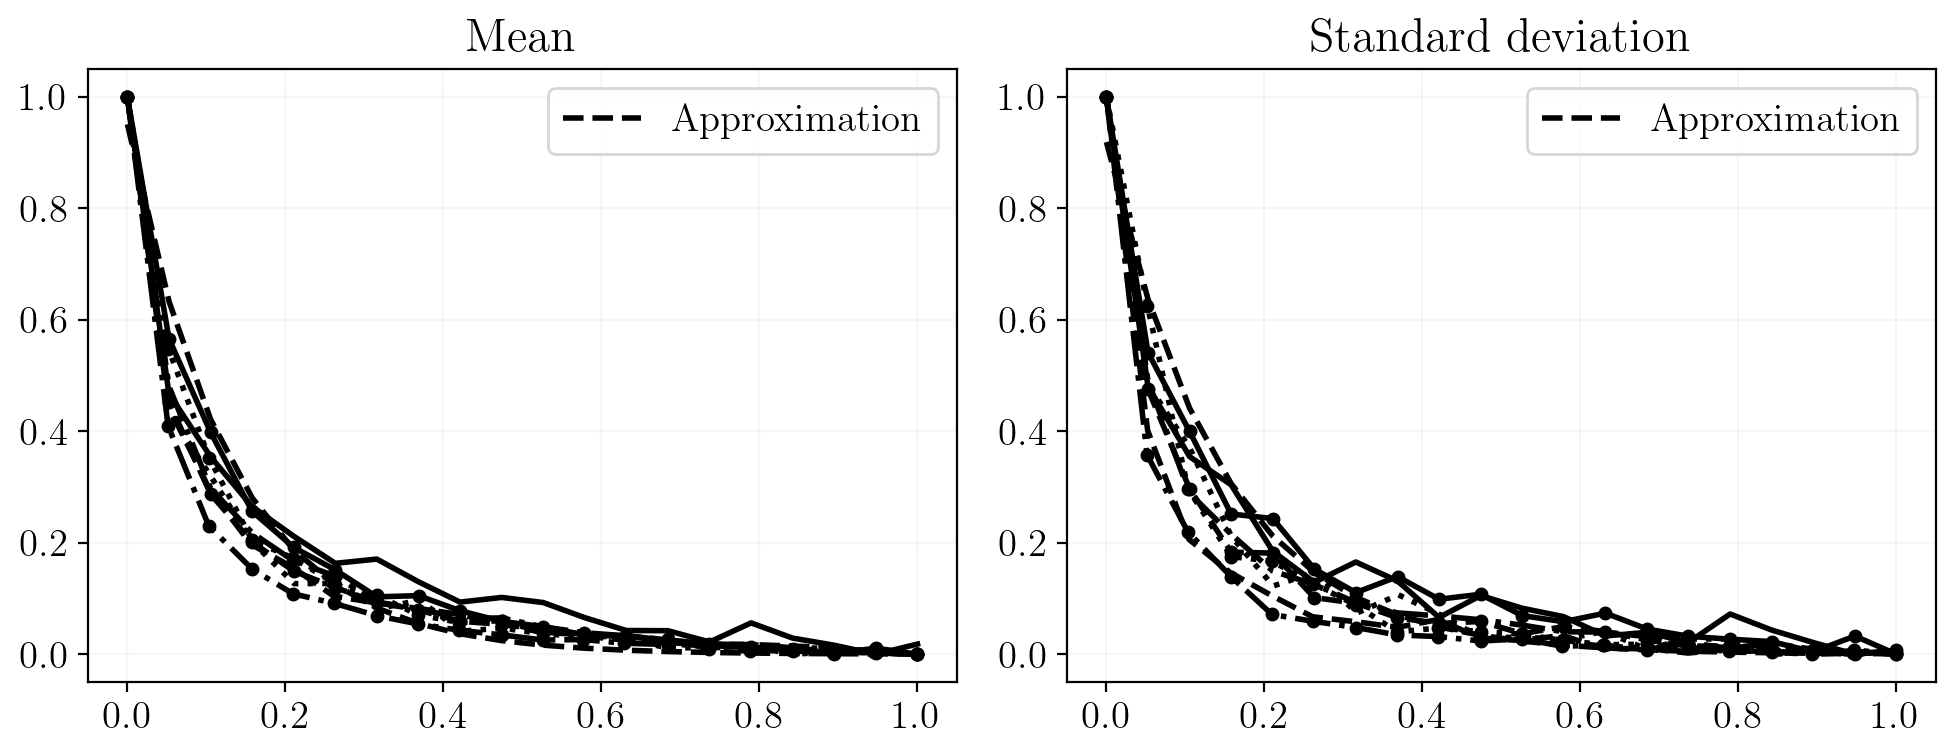

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

for name in results_regression.keys():
    sample_sizes = results_regression[name]['sample_sizes']
    mean = results_regression[name]['mean']
    std = results_regression[name]['std']
    x_vals = sample_sizes - min(sample_sizes)
    x_vals = x_vals / max(x_vals)
    y_vals_mean = mean - min(mean)
    y_vals_mean = y_vals_mean / max(y_vals_mean)
    y_vals_std = std - min(std)
    y_vals_std = y_vals_std / max(y_vals_std)
    ax1.plot(x_vals, y_vals_mean) #, label=name)
    ax2.plot(x_vals, y_vals_std) #, label=name)

#print(best) # print best function
#print(f"MSE: {best.calculate_fitness(X=x_vals, y=y_vals)}")

sample_sizes = results_regression['Parkinsons Telemonitoring']['sample_sizes']
mean = results_regression['Parkinsons Telemonitoring']['mean']
std = results_regression['Parkinsons Telemonitoring']['std']
x_vals = sample_sizes - min(sample_sizes)
x_vals = x_vals / max(x_vals)
y_vals_mean = mean - min(mean)
y_vals_mean = y_vals_mean / max(y_vals_mean)
y_vals_std = std - min(std)
y_vals_std = y_vals_std / max(y_vals_std)

best.calculate_fitness(X=x_vals, y=y_vals_mean)
y_pred_mean = [best.evaluate(x, best.w_opt) for x in x_vals] #predictions of our best calculated function
best.calculate_fitness(X=x_vals, y=y_vals_std)
y_pred_std = [best.evaluate(x, best.w_opt) for x in x_vals] #predictions of our best calculated function
 
ax1.plot(x_vals, y_pred_mean, color='black', linestyle='dashed', label='Approximation')  #plot original function
ax2.plot(x_vals, y_pred_std, color='black', linestyle='dashed', label='Approximation')  #plot original function
ax1.legend()
ax2.legend()
ax1.set_title('Mean')
ax2.set_title('Standard deviation')
plt.tight_layout()
plt.savefig(figures_path+"datasets_regression", bbox_inches="tight", format=format)
plt.show()

Посмотрим, какое семейство функций получилось

In [10]:
print(best)

w[0]*exp(w[1]*x)


Учитывая то, что при аппроксимации зависимости нормировались на [0, 1], нам потребуется добавить еще один параметр в исследуемое семейство. Итак, получаем семейство функций для аппроксимации функции правдоподобия в задаче регрессии

$$ w_0 + w_1 \cdot \exp(w_2 \cdot x) $$

# Classification

In [13]:
results_classification = load_object("../plots/datasets_classification.pkl")

С помощью генетического алгоритма найдем семейство функций, которые лучше всего приближают исследуемый набор зависимостей

In [14]:
POP_SIZE = 1000 # number of chromosomes in population
NUM_FOR_SELECTION = POP_SIZE // 3 # number of chromosomes to be chosen for selection
FUNCTIONS = {1: ['sin', 'cos', 'exp', 'log', 'ctg', 'cth'], 
             2: ['+', '-', '*', '/']} # unary and binary functions
DEPTH = 1 # initial depth of trees
MAX_DEPTH = 8 # maximum depth of a tree 
NUMBER_ITERS = 1000 # number of iterations

pop = Population(POP_SIZE, NUM_FOR_SELECTION, FUNCTIONS, DEPTH, MAX_DEPTH) # create the population
alg = Algorithm(pop, NUMBER_ITERS, datasets=results_classification, epoch_feedback=100) # create the algorithm
best = alg.train() #train the alrogithm

Training process has started


/Users/kisnikser/Documents/GitHub/Bayesian-Sample-Size-Estimation/code/genetic_algorithm/chromosome.py:96: RuntimeWarning: invalid value encountered in scalar divide
  return w[index] * (left / right), index_right
/Users/kisnikser/Documents/GitHub/Bayesian-Sample-Size-Estimation/code/genetic_algorithm/chromosome.py:96: RuntimeWarning: divide by zero encountered in scalar divide
  return w[index] * (left / right), index_right
/Users/kisnikser/Documents/GitHub/Bayesian-Sample-Size-Estimation/code/genetic_algorithm/chromosome.py:96: RuntimeWarning: invalid value encountered in scalar multiply
  return w[index] * (left / right), index_right
/Users/kisnikser/Documents/GitHub/Bayesian-Sample-Size-Estimation/code/genetic_algorithm/chromosome.py:108: RuntimeWarning: invalid value encountered in scalar divide
  return w[index] * 1/np.tan(left), index_left
/Users/kisnikser/Documents/GitHub/Bayesian-Sample-Size-Estimation/code/genetic_algorithm/chromosome.py:108: RuntimeWarning: divide by zero en

[Epoch 100/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.005751867321559132


/Users/kisnikser/Documents/GitHub/Bayesian-Sample-Size-Estimation/code/genetic_algorithm/chromosome.py:106: RuntimeWarning: invalid value encountered in log
  return w[index] * np.log(left), index_left
/Users/kisnikser/Documents/GitHub/Bayesian-Sample-Size-Estimation/code/genetic_algorithm/chromosome.py:100: RuntimeWarning: invalid value encountered in sin
  return w[index] * np.sin(left), index_left


[Epoch 200/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.005751867321559132
[Epoch 300/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.005751867321559132
[Epoch 400/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.005751867321559132
[Epoch 500/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.005751867321559132
[Epoch 600/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.005751867321559132
[Epoch 700/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.005751867321559132


/Users/kisnikser/Documents/GitHub/Bayesian-Sample-Size-Estimation/code/genetic_algorithm/chromosome.py:102: RuntimeWarning: invalid value encountered in cos
  return w[index] * np.cos(left), index_left


[Epoch 800/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.005751867321559132
[Epoch 900/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.005751867321559132
[Epoch 1000/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.005751867321559132


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


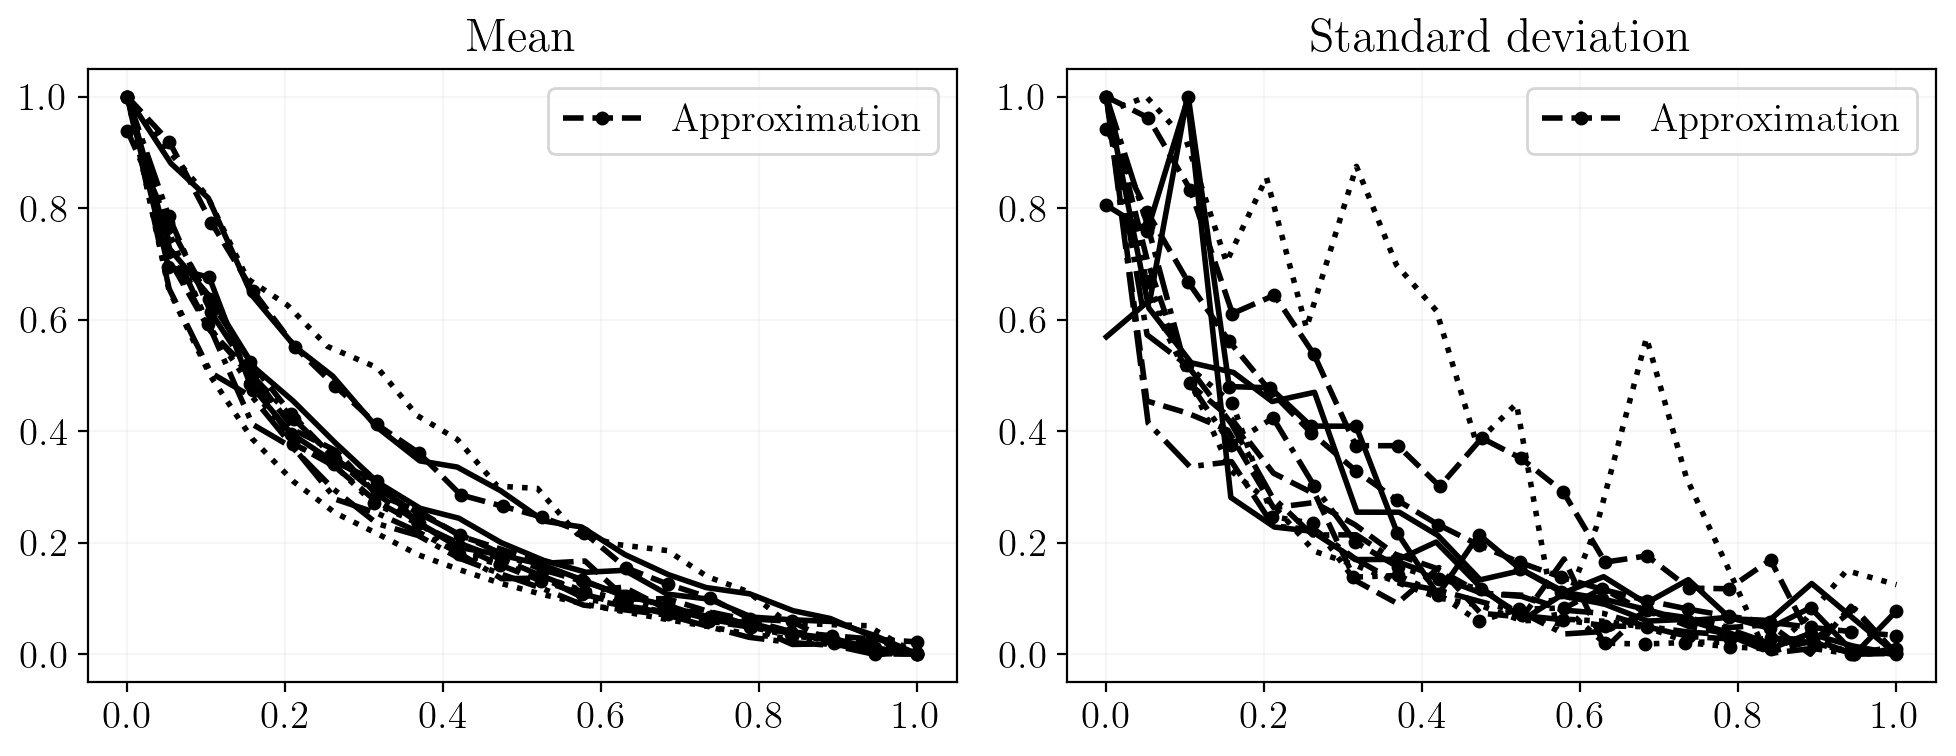

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

for name in results_classification.keys():
    sample_sizes = results_classification[name]['sample_sizes']
    mean = results_classification[name]['mean']
    std = results_classification[name]['std']
    x_vals = sample_sizes - min(sample_sizes)
    x_vals = x_vals / max(x_vals)
    y_vals_mean = mean - min(mean)
    y_vals_mean = y_vals_mean / max(y_vals_mean)
    y_vals_std = std - min(std)
    y_vals_std = y_vals_std / max(y_vals_std)
    ax1.plot(x_vals, y_vals_mean) #, label=name)
    ax2.plot(x_vals, y_vals_std) #, label=name)

#print(best) # print best function
#print(f"MSE: {best.calculate_fitness(X=x_vals, y=y_vals)}")

sample_sizes = results_classification['Glass Identification']['sample_sizes']
mean = results_classification['Glass Identification']['mean']
std = results_classification['Glass Identification']['std']
x_vals = sample_sizes - min(sample_sizes)
x_vals = x_vals / max(x_vals)
y_vals_mean = mean - min(mean)
y_vals_mean = y_vals_mean / max(y_vals_mean)
y_vals_std = std - min(std)
y_vals_std = y_vals_std / max(y_vals_std)

best.calculate_fitness(X=x_vals, y=y_vals_mean)
y_pred_mean = [best.evaluate(x, best.w_opt) for x in x_vals] #predictions of our best calculated function
best.calculate_fitness(X=x_vals, y=y_vals_std)
y_pred_std = [best.evaluate(x, best.w_opt) for x in x_vals] #predictions of our best calculated function
 
ax1.plot(x_vals, y_pred_mean, color='black', linestyle='dashed', label='Approximation')  #plot original function
ax2.plot(x_vals, y_pred_std, color='black', linestyle='dashed', label='Approximation')  #plot original function
ax1.legend()
ax2.legend()
ax1.set_title('Mean')
ax2.set_title('Standard deviation')
plt.tight_layout()
plt.savefig(figures_path+"datasets_classification", bbox_inches="tight", format=format)
plt.show()

Посмотрим, какое семейство функций получилось

In [342]:
print(best)

w[0]*exp(w[1]*x)

Учитывая то, что при аппроксимации зависимости нормировались на [0, 1], нам потребуется добавить еще один параметр в исследуемое семейство. Итак, получаем семейство функций для аппроксимации функции правдоподобия в задаче регрессии

$$ w_0 + w_1 \cdot \exp(w_2 \cdot x) $$